In [25]:
from suaBibSignal import *
import numpy as np
import sounddevice as sd
import soundfile as sf
import matplotlib.pyplot as plt
import scipy
import time

In [26]:
fs = 44100
frequency_AM = 14000
sd.default.samplerate = fs
sd.default.channels = 1
signal = signalMeu()

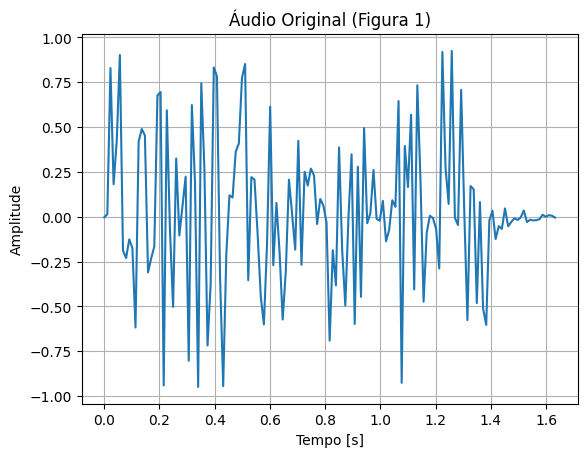

In [27]:
audio, samplerate = sf.read('./Waves/oh-my-god-meme.wav')
y_audio = audio[:,1]
samples_audio = len(y_audio)
duration = samples_audio / fs
t_domain = np.linspace(0, duration, samples_audio)
normalized_audio = y_audio / np.max(np.abs(y_audio))

plt.figure()
plt.plot(t_domain[::500], normalized_audio[::500])
plt.title('Áudio Original (Figura 1)')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

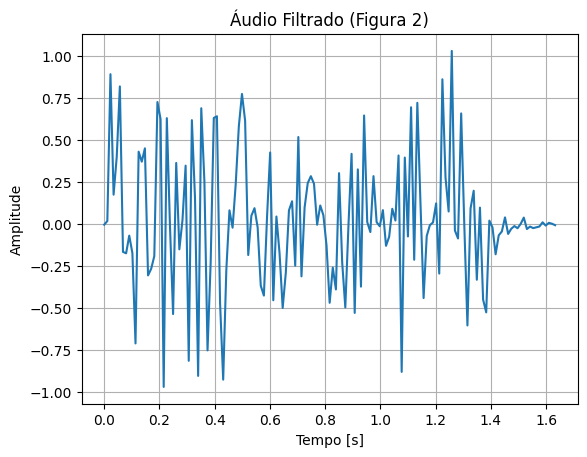

In [28]:
# 3000 de frequência, para quando chegar a 4000 de frequência, o áudio já estar em baixa
b, a = scipy.signal.butter(4, 3000, 'lowpass', fs=samplerate)
filtered_audio = scipy.signal.filtfilt(b, a, normalized_audio)
plt.figure()
plt.plot(t_domain[::500], filtered_audio[::500])
plt.title('Áudio Filtrado (Figura 2)')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

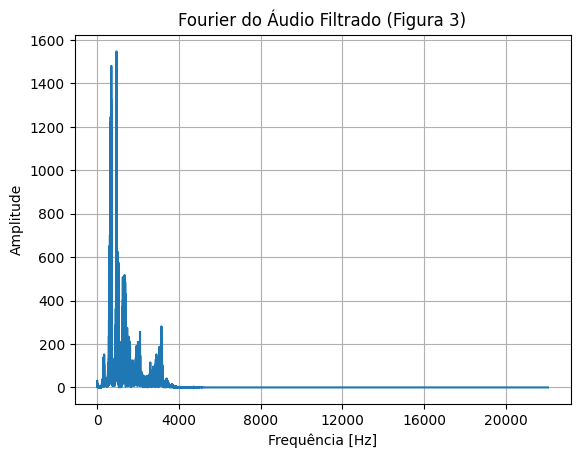

In [29]:
x, y = signal.calcFFT(filtered_audio, fs)

plt.figure()
plt.plot(x, np.abs(y))
plt.title('Fourier do Áudio Filtrado (Figura 3)')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude')
plt.xticks(np.arange(0, 22000, 4000))
plt.grid()
plt.show()

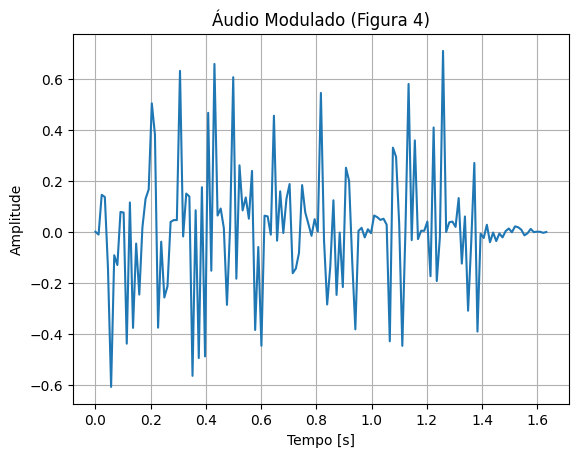

In [30]:
A = 1
W = 2*np.pi*frequency_AM
sine = A*np.sin(W*t_domain)
modulated_audio = sine*y_audio

plt.figure()
plt.plot(t_domain[::500], modulated_audio[::500])
plt.title('Áudio Modulado (Figura 4)')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

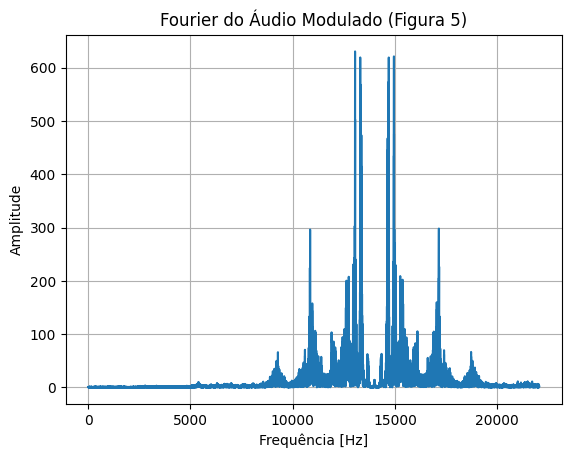

In [31]:
x, y = signal.calcFFT(modulated_audio, fs)

plt.figure()
plt.plot(x, np.abs(y))
plt.title('Fourier do Áudio Modulado (Figura 5)')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude')
plt.xticks(np.arange(0, 22000, 5000))
plt.grid()
plt.show()

In [32]:
gap = 2.5

print('Áudio origial')
sd.play(audio, fs)
time.sleep(gap)
print('Fim do áudio original\n')

print('Áudio filtrado')
sd.play(filtered_audio, fs)
time.sleep(gap)
print('Fim do áudio filtrado\n')

print('Áudio normalizado')
sd.play(normalized_audio, fs)
time.sleep(gap)
print('Fim do áudio normalizado\n')

print('Áudio modulado')
sd.play(modulated_audio, fs)
time.sleep(gap)
print('Fim do áudio modulado\n')

sd.wait()
sf.write('./Waves/oh-my-god-meme-modulated.wav', modulated_audio, fs)
print('Áudio modulado salvo.')

Áudio origial
Fim do áudio original

Áudio filtrado
Fim do áudio filtrado

Áudio normalizado
Fim do áudio normalizado

Áudio modulado
Fim do áudio modulado

Áudio modulado salvo.
